In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv'

In [14]:
!wget $data

--2025-06-30 11:46:56--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/refs/heads/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.2’

data.csv.2          100%[===================>]   1.41M  --.-KB/s    in 0.1s    

2025-06-30 11:46:56 (10.2 MB/s) - ‘data.csv.2’ saved [1475504/1475504]



In [16]:
df = pd.read_csv('data.csv')

In [17]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [18]:
df.columns


Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [32]:
df.columns.str.lower().str.replace(" ", "_")

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [34]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [35]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [66]:
df.dtypes[df.dtypes == "object"]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [75]:
categorical_columns = df.columns[df.dtypes == "object"]

In [78]:
list(categorical_columns)

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [83]:
for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [85]:
df['make']

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

In [88]:
df.tail()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920
11913,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,26,17,61,28995


In [122]:
#data exploration for glimpse

for col in df.columns:
    print(df[col].unique([5])
  

SyntaxError: incomplete input (481810628.py, line 5)

In [114]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [118]:
df["make"].unique()[:5]

array(['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler'], dtype=object)

In [136]:
for col in df.columns:
    if (df[col].dtypes == "object"):
        print("Categorical values")
        print("*****************************************************")
        print(f"The column {col} is explored")
        print(df[col].unique()[:5])
        print(df[col].nunique())
        print ()
        
    else:
        print("*****************************************************")
        print(f"The column {col} is explored")
        print("This are numerical values")
        df[col].max, df[col].min,
        
    

Categorical values
*****************************************************
The column make is explored
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

Categorical values
*****************************************************
The column model is explored
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

*****************************************************
The column year is explored
This are numerical values
Categorical values
*****************************************************
The column engine_fuel_type is explored
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

*****************************************************
The column engine_hp is explored
This are numerical values
*****************************************************
The column engine_cylinders is explored
This are numerical values
Categorical values
*****************************************************
The column transmission_type i

In [137]:
df.shape

(11914, 16)

In [164]:
for i in range(df.shape[1]):
    print(i, df.columns[i])
    name = df.columns[i]
    print(df[name].unique()[:5])
    print(df[name].nunique())
    print()
    print
    

0 make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

1 model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

2 year
[2011 2012 2013 1992 1993]
28

3 engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

4 engine_hp
[335. 300. 230. 320. 172.]
356

5 engine_cylinders
[ 6.  4.  5.  8. 12.]
9

6 transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

7 driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

8 number_of_doors
[ 2.  4.  3. nan]
3

9 market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

10 vehicle_size
['compact' 'midsize' 'large']
3

11 vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

12 highway_mpg
[26 28 27 25 24]
59

13 city_mpg
[19 20 18 17 16]
69

14 popularity
[3916 3105  819  617 1013]
48

AttributeError: 'int' object has no attribute 'ndim'

<Axes: xlabel='msrp', ylabel='Count'>

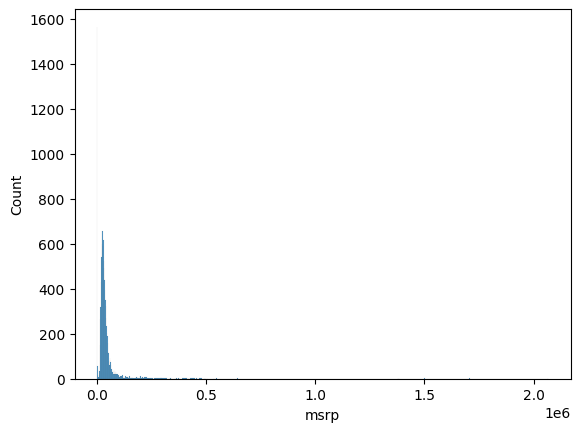

In [166]:
sns.histplot(df["msrp"])

<Axes: xlabel='msrp', ylabel='Count'>

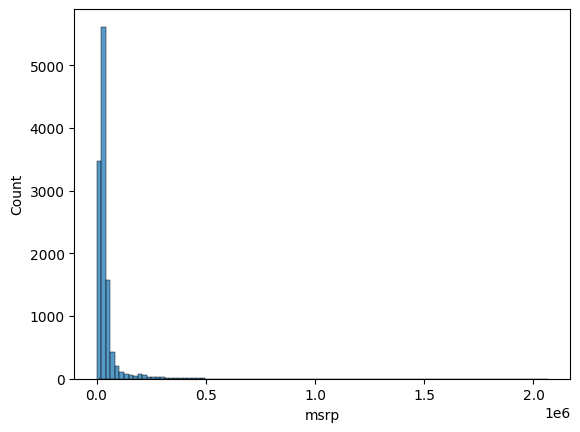

In [168]:
sns.histplot(df.msrp, bins = 100)

<Axes: xlabel='msrp', ylabel='Count'>

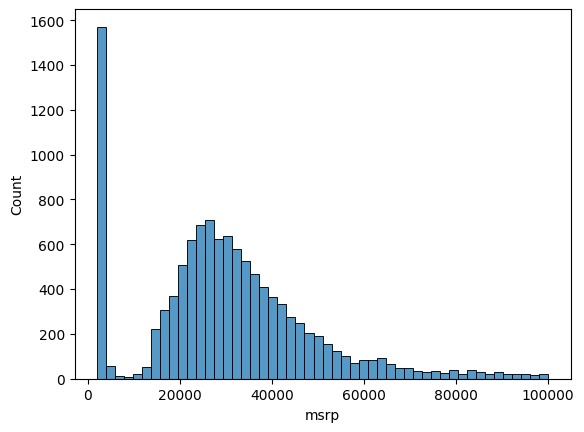

In [178]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

In [170]:
df.msrp <= 1000000

0        True
1        True
2        True
3        True
4        True
         ... 
11909    True
11910    True
11911    True
11912    True
11913    True
Name: msrp, Length: 11914, dtype: bool

In [171]:
df.shape

(11914, 16)

In [173]:
df.msrp[df.msrp<= 1000000]

0        46135
1        40650
2        36350
3        29450
4        34500
         ...  
11909    46120
11910    56670
11911    50620
11912    50920
11913    28995
Name: msrp, Length: 11908, dtype: int64

In [179]:
##Exploring mathematics in python to understand algebra

In [180]:
np

<module 'numpy' from '/home/mudashiru/Data_analytics/titanic_project/mywsl/lib/python3.10/site-packages/numpy/__init__.py'>

In [206]:
np.zeros((3,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [182]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [191]:
np.full((2,3),0)

array([[0, 0, 0],
       [0, 0, 0]])

In [200]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [202]:
np.arange(3, 8)

array([3, 4, 5, 6, 7])

In [204]:
np.linspace(0, 10, 2)

array([ 0., 10.])

In [210]:
np.random.seed(2)
np.random.rand(5,2)

array([[0.4359949 , 0.02592623],
       [0.54966248, 0.43532239],
       [0.4203678 , 0.33033482],
       [0.20464863, 0.61927097],
       [0.29965467, 0.26682728]])

In [222]:
np.random.seed(2)
np.random.randint(low = 5, high = 20, size = (2,3))


array([[13, 18, 13],
       [11, 16,  7]])

In [217]:
np.random.randn(2, 3)

array([[-0.87810789, -0.15643417,  0.25657045],
       [-0.98877905, -0.33882197, -0.23618403]])

In [220]:
np.random.randint(2, 5, 3)

array([4, 2, 4])

In [232]:
a = np.array([2,3,4,1])

In [225]:
b = np.arange(5, 9)

In [233]:
b * a  

array([10, 18, 28,  8])

In [259]:
c = np.array(([2, 4, 5], [5, 6, 7]))
print(c), print(c.shape)

[[2 4 5]
 [5 6 7]]
(2, 3)


(None, None)

In [240]:
def ve_mult(x, y):
    z = np.zeros(x.shape[0])
    assert x.shape[0] == y.shape[0]
    length = x.shape[0]
    for i in range(length):
        z[i] = x[i] * y[i]
    return(z)
    
    

In [260]:
def matrix_vector(U, v):
    assert U.shape[1] == v.shape[0]
    nr_row = v.shape[0]
    new = np.zeros(nr_rows)
    new[i] = dot_multiplication(U[i], v)
    return(new)
    
    
    
    

In [241]:
ve_mult(b, a)

array([10., 18., 28.,  8.])

In [245]:
def dot_multiplication(a, b):
    assert a.shape[0] == b.shape[0]
    result = 0.0
    
    for i in range(a.shape[0]):
        result = result + a[i] * b[i]
    return result
    

In [246]:
m

np.float64(64.0)

In [247]:
a.dot(b)

np.int64(64)

In [250]:
a.shape

(4,)